<h1>About the Dataset:
This dataset captures the relationship between home cost and average income across geographic
regions of the United States over time. Ultimately I intend to augment this dataset with relevant
economic indicators from Federal Reserve Economic Data (FRED) to better elucidate insights
about the US Real Estate Market, the status of the US Economy, and the interaction between
these constructs.</h1>
    
<h2>Categorical Data: classify or group elements.<h2>
<li> Year: Represents distinct time periods (e.g., 2022 December).</li>
<li> Month: Indicates specific months within the year (e.g., December).</li>
<li> Region: Categorizes data based on geographical areas (e.g., Midwest, Northeast, South).</li>
<li> Home Size: Classifies homes into categories (e.g., Double, Single, Total).</li>
<li> Purchase Completion: Represents a binary outcome (0/1).</li>
    
<h2>Numerical Data: represents quantities or measurements.</h2>
<li> Average Sales Price: Represents the average price of homes sold in a specific category.</li>
<li> Number of Households (Thousands): Indicates the number of households in thousands.</li>
<li> Median Income - Current Dollars: Shows the median income in current dollars.</li>
<li> Median Income - 2022 Dollars: Shows the median income adjusted to 2022 dollars.</li>
<li> Mean Income - Current Dollars: Shows the mean income in current dollars.</li>
<li> Mean Income - 2022 Dollars: Shows the mean income adjusted to 2022 dollars.</li>

<h2>Objective: To Demonstrate k-means clustering using the sklearn library for the dataset of your choice</h2>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv(r'/Users/sachintony/Desktop/BCA/6BCA/ML/USRECD2.csv')
print("Dataset Loaded:\n", df.head())
print("\nDataset Info:")
print(df.info())

Dataset Loaded:
    Year  Month     Region Home Size  Purchase Completion  Average Sales Price  \
0  2022     12    Midwest    Double                    0               144300   
1  2022     12    Midwest   Single                     0                82300   
2  2022     12    Midwest    Total1                    0               104700   
3  2022     12  Northeast    Double                    0               158300   
4  2022     12  Northeast   Single                     0                75300   

   Number of Households (Thousands)  Median Income - Current Dollars  \
0                             28280                            73070   
1                             28280                            73070   
2                             28280                            73070   
3                             22630                            80360   
4                             22630                            80360   

   Median Income - 2022 Dollars  Mean Income - Current Dollars 


Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

After Handling Missing Values:
 Year                                0
Month                               0
Region                              0
Home Size                           0
Purchase Completion                 0
Average Sales Price                 0
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

Descriptive Statistics:
              Year       Month  Purchase Completion  Average S

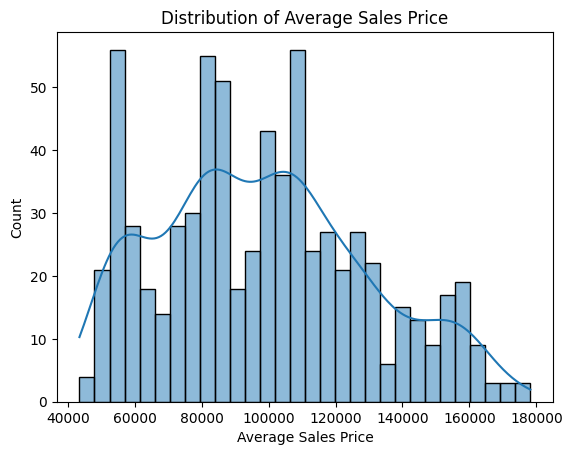

/var/folders/46/tr7jpvg55437fx19_y030wb40000gn/T/ipykernel_23419/2914738301.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='pastel')


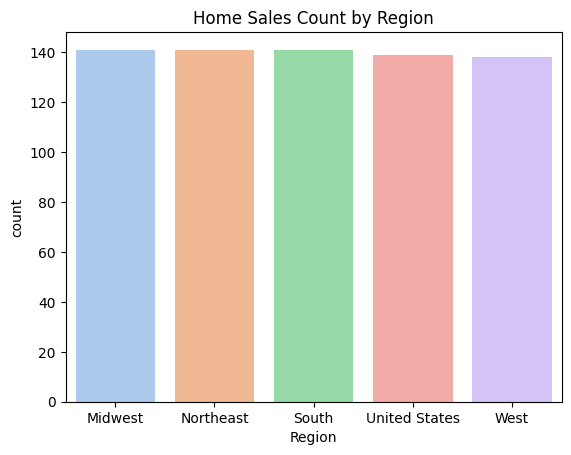

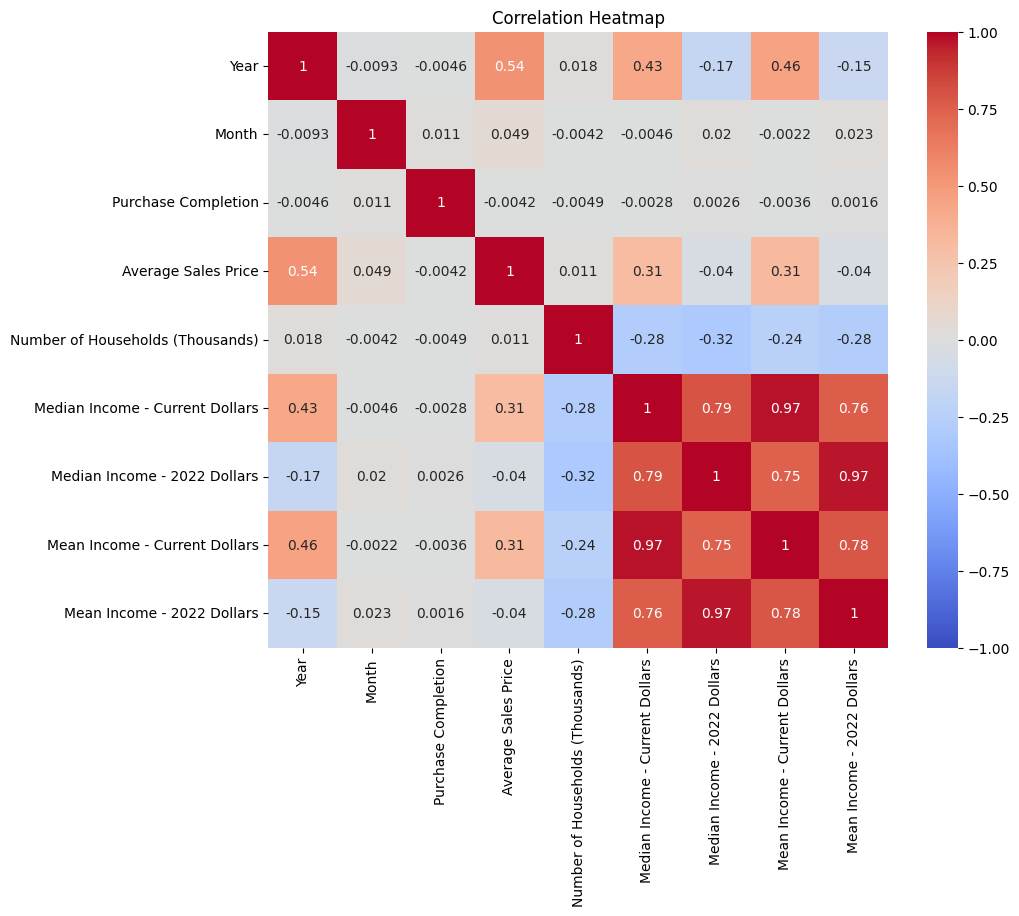

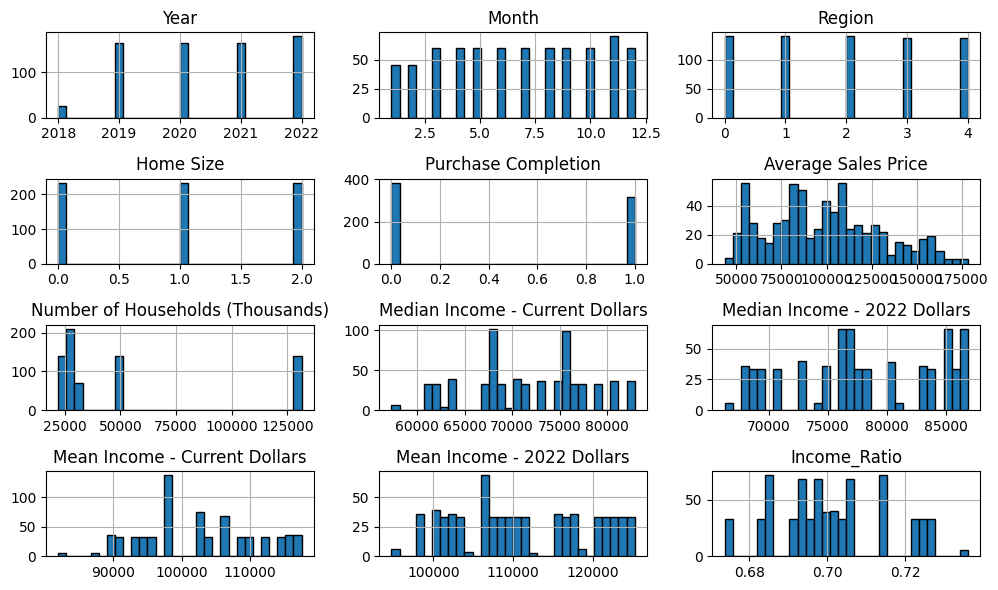

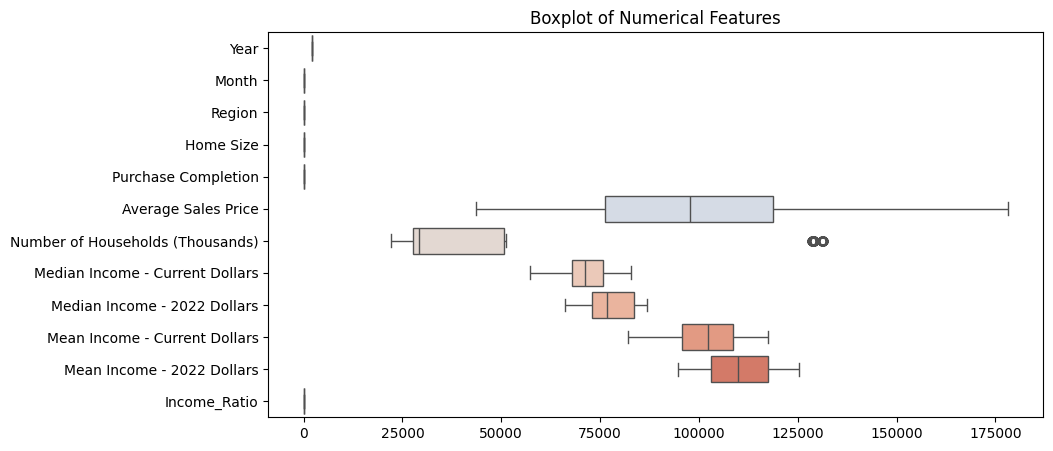

In [13]:
# Detailed EDA
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nAfter Handling Missing Values:\n", df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Visualization
# Distribution of Average Sales Price
sns.histplot(df['Average Sales Price'], bins=30, kde=True)
plt.title('Distribution of Average Sales Price')
plt.show()

# Count plot of Regions
sns.countplot(x='Region', data=df, palette='pastel')
plt.title('Home Sales Count by Region')
plt.show()

# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
# Encode categorical features
categorical_cols = ['Region', 'Home Size']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Create a new feature: Income Ratio
df['Income_Ratio'] = df['Median Income - Current Dollars'] / df['Mean Income - Current Dollars']

# Drop unnecessary columns
df_reduced = df[['Region', 'Home Size', 'Average Sales Price', 'Income_Ratio', 'Purchase Completion']]

# Histograms for numerical variables
df.hist(figsize=(10, 6), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

# Boxplot for numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify categorical columns
categorical_columns = ["Month", "Region", "Home Size", "Purchase Completion"]  # Adjust based on your dataset

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Normalize numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print(df_scaled[:5])  # Display first 5 rows of scaled data

[[ 1.29459525e+00  1.54735767e+00 -1.40819153e+00 -1.22256056e+00
  -9.07147544e-01  1.48464757e+00 -5.89687992e-01  2.08631726e-01
  -7.95503701e-01 -2.99048625e-03 -1.03605491e+00  8.81069501e-01]
 [ 1.29459525e+00  1.54735767e+00 -1.40819153e+00  1.74901367e-03
  -9.07147544e-01 -5.20278249e-01 -5.89687992e-01  2.08631726e-01
  -7.95503701e-01 -2.99048625e-03 -1.03605491e+00  8.81069501e-01]
 [ 1.29459525e+00  1.54735767e+00 -1.40819153e+00  1.22605858e+00
  -9.07147544e-01  2.04082046e-01 -5.89687992e-01  2.08631726e-01
  -7.95503701e-01 -2.99048625e-03 -1.03605491e+00  8.81069501e-01]
 [ 1.29459525e+00  1.54735767e+00 -7.00049238e-01 -1.22256056e+00
  -9.07147544e-01  1.93737275e+00 -7.30762016e-01  1.40972344e+00
   4.08692979e-01  1.50899668e+00  5.00129124e-01 -2.89193612e-01]
 [ 1.29459525e+00  1.54735767e+00 -7.00049238e-01  1.74901367e-03
  -9.07147544e-01 -7.46640841e-01 -7.30762016e-01  1.40972344e+00
   4.08692979e-01  1.50899668e+00  5.00129124e-01 -2.89193612e-01]]


<h2> Categorical Encoding and Normalization </h2>
<h3> In order to prepare the dataset for K-Means clustering, we need to ensure that all data is numerical and properly scaled. Since our dataset contains
categorical columns such as "Month", "Region", "Home Size", "Purchase Completion", they must be converted into numerical values before applying clustering algorithms.</h3>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

wcss = []
K_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)  # Prints the WCSS values for each K

[8400.0, 6194.766647296823, 5346.324094116879, 4656.689770203282, 4129.114812141402, 3886.4389427200504, 3568.928735806507, 3395.1830113267297, 3217.142464039098, 3051.475939369709]


<h2>Interpreting the WCSS Values for Optimal Clusters</h2>

<h3>The Within-Cluster Sum of Squares (WCSS) represents the total variance within clusters and helps determine the optimal number of clusters for K-Means.
As the number of clusters (K) increases from 1 to 10, we observe a consistent decrease in WCSS values:
This decline occurs because adding more clusters reduces the intra-cluster distance, making each cluster more compact. However, the goal is to identify the point where adding extra clusters results in diminishing improvements—this is called the "elbow point". From the given values, the WCSS shows a sharp decline up to K=4 or K=5, after which the reduction slows. This suggests that around 4 to 5 clusters might be an optimal choice, balancing compactness and efficiency in clustering without unnecessary complexity.<h3>

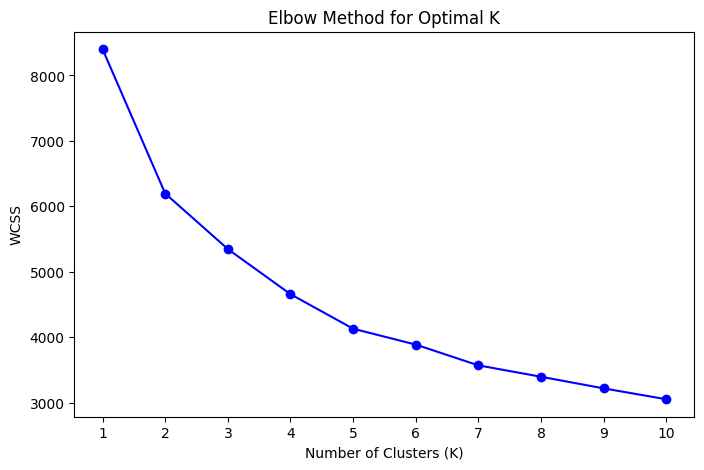

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.show()

<h2>Interpreting the Elbow Method Plot</h2>
<h3>The Elbow Method plot visually represents the WCSS values for different numbers of clusters (K) to determine the optimal number of clusters.
The x-axis denotes the number of clusters, while the y-axis shows the Within-Cluster Sum of Squares (WCSS). The curve exhibits a sharp decline
initially but gradually levels off, forming an "elbow" shape.
From the plotted graph, we observe a significant drop in WCSS up to K = 4 or K = 5, after which the reduction slows. This indicates that increasing
clusters beyond this point results in minimal improvements, meaning the data is already well-clustered. The ideal choice for K is typically at the
"elbow point," which, based on the trend, appears to be 4 or 5 clusters. Choosing a K value around this ensures a good balance between compact clusters
and computational efficiency.</h3>

In [20]:
#Silhouette Score (Higher is Better)

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Define the optimal number of clusters (replace K with the best value from the elbow method)
K = 3  

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2293


<h2> Interpreting the Silhouette Score </h2>
<h3>The Silhouette Score measures how well-defined the clusters are, ranging from -1 to 1, where:

Closer to 1 → Well-separated and dense clusters (good clustering).
Near 0 → Clusters are overlapping (borderline clustering).
Negative values → Samples are assigned to the wrong clusters.
In this case, the Silhouette Score is 0.2293, which suggests that the clustering structure is present but not very strong.
This indicates that while the clusters are distinguishable, they may still have some overlap. To improve clustering, we could try tuning K (number of clusters), using different distance metrics, or applying feature selection/dimensionality reduction
techniques to enhance separability.</h3>

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

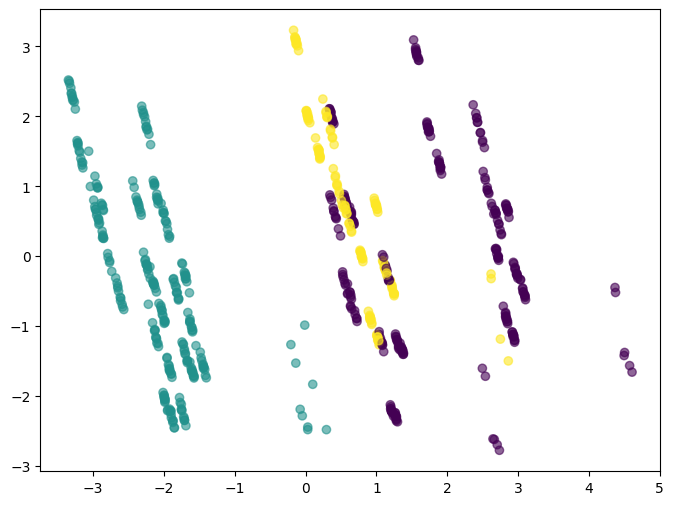

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering (2D Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

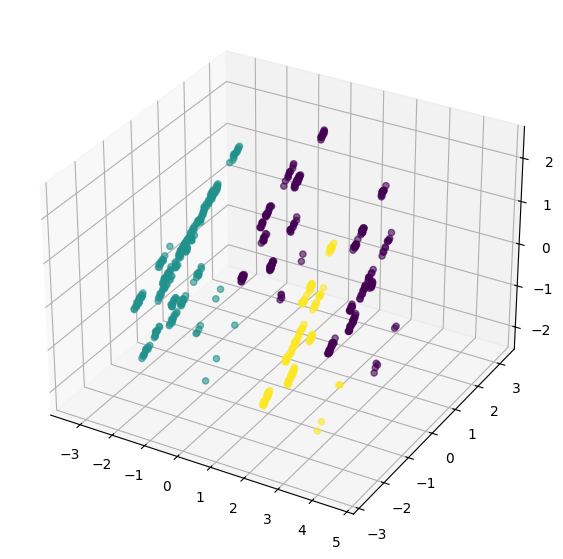

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D using PCA
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_title("K-Means Clustering (3D Visualization)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()


In [25]:
print(f"Optimal Clusters: {K}")  # Replace K with your chosen cluster count
print(f"Silhouette Score: {silhouette_avg:.4f}")  

# Count how many points in each cluster
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print("Cluster Distribution:", cluster_distribution)

Optimal Clusters: 3
Silhouette Score: 0.2293
Cluster Distribution: {0: 282, 1: 279, 2: 139}


In [27]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_reduced)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

In [28]:
# Compute Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

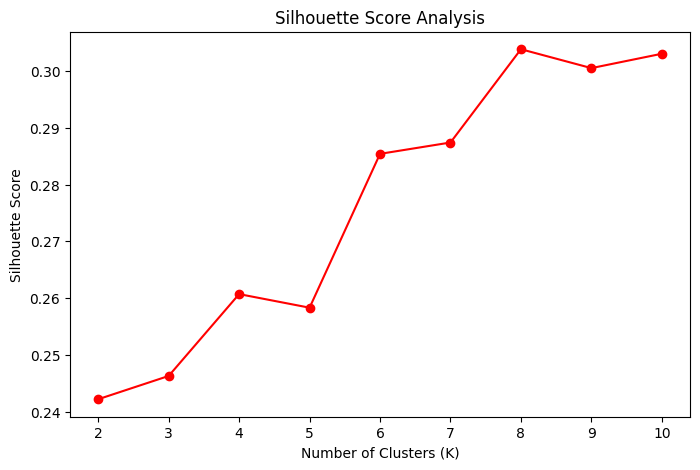

In [29]:
# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()